In [2]:
%config InlineBackend.rc = {"figure.dpi": 72, 'figure.figsize': (6.0, 4.0)}
%matplotlib inline

import abtem
import ase
import matplotlib.pyplot as plt
import numpy as np

abtem.config.set({"local_diagnostics.progress_bar": True});

# Visualizations

In [1]:
%matplotlib ipympl

import abtem
import ase
import matplotlib.pyplot as plt
import time

atoms_cell = ase.build.bulk("Si", cubic=True)

atoms = atoms_cell*(1,1,200)

abtem.show_atoms(atoms);

potential = abtem.Potential(atoms, sampling=.05, exit_planes=1, slice_thickness=1)

wave = abtem.PlaneWave(energy=200e3, normalize=False)

wave.grid.match(potential)

diffraction_patterns = wave.build().multislice(potential).diffraction_patterns().block_direct().compute()

spots = diffraction_patterns.crop(120).index_diffraction_spots(cell=atoms_cell.cell, threshold=1e-4)#

from abtem.visualize import DiffractionSpotsVisualization, AxesGrid
with plt.ioff():
    fig = plt.figure()

axes = AxesGrid(fig, 1, 1)
visualization = DiffractionSpotsVisualization(spots[50:], axes, axes_types=("index",), power=1, autoscale=False, cmap="viridis", scale=1)

visualization.interact(True)

ImportError: cannot import name 'add_miller_index_annotations' from 'abtem.visualize' (C:\Users\jacob\PycharmProjects\abTEM_dask\abtem\visualize.py)

## Adjusting individual elements

In [150]:
atoms = ase.build.mx2(vacuum=2)
atoms = abtem.orthogonalize_cell(atoms) * (3, 2, 1)

wave = abtem.PlaneWave(energy=80e3, sampling=0.05)

exit_wave = (
    wave.multislice(atoms).apply_ctf(defocus=np.linspace(0, 200, 4)).compute()
)

measurements = exit_wave.intensity()

[########################################] | 100% Completed | 104.27 ms


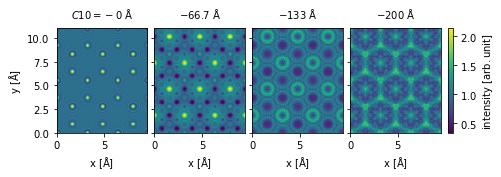

In [185]:
visualization = measurements.show(explode=True, common_color_scale=True, figsize=(8,8), cbar=True, cmap="gray")

# visualization.set_axes_padding((0.0, 0.0))
# visualization.set_column_titles(units="nm")
# visualization.set_cbar_size(.1)
# visualization.set_cbar_padding((0.,0.))
# visualization.set_x_units("nm")
# visualization.set_y_units("nm")
# visualization.axis_off()
# visualization.set_sizebars(size=3, frameon=False, color="w")

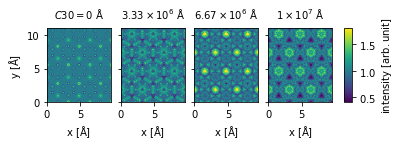

In [59]:
visualization.axes[0,0].get_figure()

In [56]:
visualization.set_axes_padding([0.0, 0])

In [38]:
probe = abtem.Probe(
    semiangle_cutoff=30,
    defocus=np.linspace(0, 100, 3),
    # Cs=np.linspace(0, 4e6, 10),
    C5=np.linspace(0, 1e8, 3),
    gpts=64,
    extent=15,
    energy=200e3,
)
probes = probe.build().complex_images().compute()

[########################################] | 100% Completed | 117.72 ms


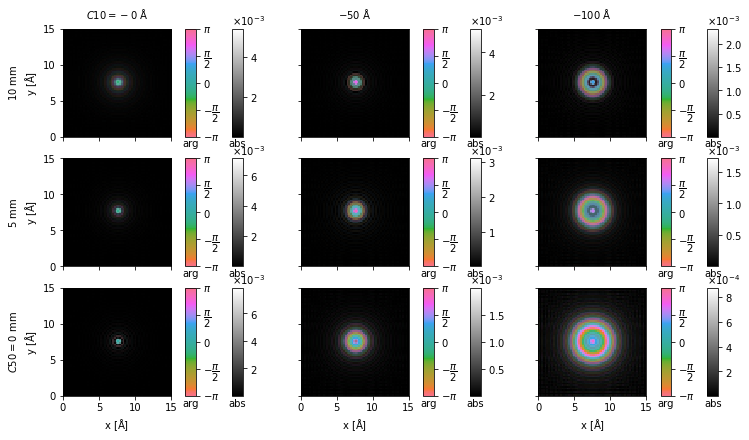

In [41]:
visualization = probes.show(explode=True, figsize=(12,12), cbar=True)
visualization.set_cbar_padding([0.2, 0.5])
visualization.set_cbar_spacing(0.5)
visualization.set_axes_padding([0.3, 0.3])
visualization.set_cbars()
visualization.set_scale_units()
visualization.set_cbar_labels()
visualization.set_x_units()
visualization.set_y_units()
visualization.set_x_labels()
visualization.set_y_labels()
visualization.set_row_titles(units="mm")
visualization.set_column_titles()

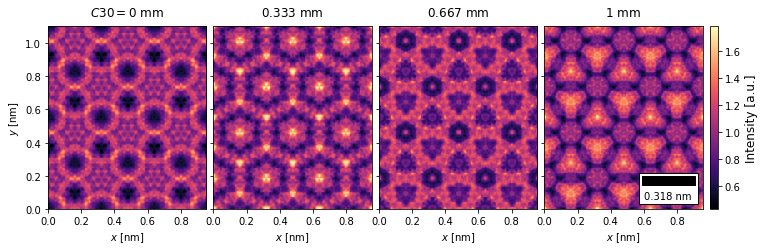

In [216]:
viz_axes.fig

## Exploded plot with two dimensions

In [203]:
from ase.build import graphene

defocus = np.linspace(-50, 50, 7)
Cs = np.linspace(0, 400000, 5)

wave = abtem.PlaneWave(energy=80e3, sampling=0.05)

atoms = graphene(vacuum=2)
atoms = abtem.orthogonalize_cell(atoms)

exit_wave = wave.multislice(atoms)

focal_spread = 30
defocus_distribution = abtem.distributions.gaussian(
    center=0.0,
    standard_deviation=focal_spread,
    num_samples=101,
    sampling_limit=2,
)

images = (
    exit_wave.apply_ctf(defocus=defocus, Cs=Cs)
    .apply_ctf(defocus=defocus_distribution)
    .intensity()
    .sum(0)
    .compute()
)

[########################################] | 100% Completed | 1.15 sms


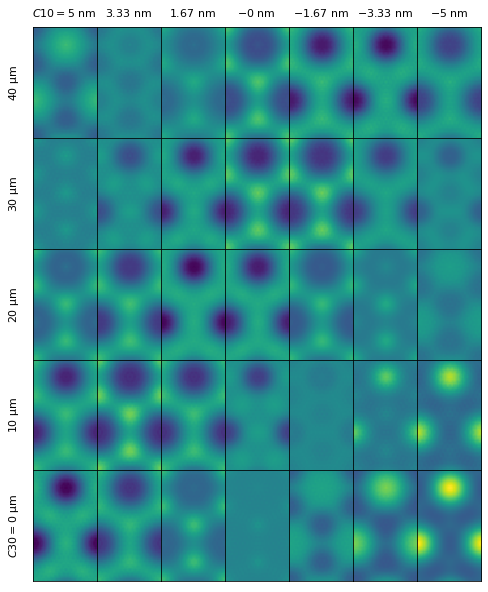

In [219]:
visualization = images.show(
    explode=True, figsize=(10, 10), common_color_scale=True, cmap="gray"
)

visualization.axes.set_axes_pad([0.0, 0.0])
visualization.axis_off()
visualization.set_row_titles(units="um", fontsize=11)
visualization.set_column_titles(units="nm", fontsize=11)

In [221]:
visualization._amplitude_images[0].axes

<Axes: >

## Custom arranged images

In [9]:
atoms = ase.build.mx2(vacuum=2)
atoms = abtem.orthogonalize_cell(atoms) * (3, 2, 1)

projected_potential_xy = (
    abtem.Potential(atoms, sampling=0.05, plane="xy").project().compute()
)
projected_potential_xz = (
    abtem.Potential(atoms, sampling=0.05, plane="xz").project().compute()
)

[########################################] | 100% Completed | 105.81 ms
[########################################] | 100% Completed | 417.51 ms


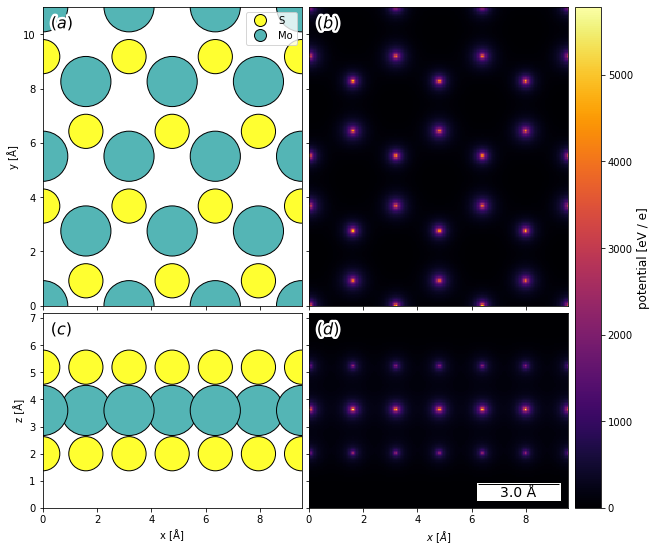

In [10]:
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(10, 10))

axes = ImageGrid(fig, 111, (2, 2), cbar_mode="single", axes_pad=0.1)

abtem.show_atoms(
    atoms,
    tight_limits=True,
    show_cell=False,
    show_periodic=True,
    legend=True,
    scale=0.6,
    ax=axes[0],
)

abtem.show_atoms(
    atoms,
    tight_limits=True,
    show_cell=False,
    show_periodic=True,
    scale=0.6,
    ax=axes[2],
    plane="xz",
)

projected_potential_xy.show(ax=axes[1], cmap="inferno", cbar=True)
projected_potential_xz.show(ax=axes[3], cmap="inferno", cbar=True)

abtem.visualize.add_sizebar(
    ax=axes[3],
    measurements=projected_potential_xy,
    size=3,
    fontproperties={"size": 14},
    formatting=".1f",
)

abtem.visualize.add_panel_labels(
    axes,
    prop={"size": 16},
)